# Summary

Exploratory data analysis of draft data (e.g. win rates)

# Introduction

I will explore the summary and draft data.  This will look at the deck-level data and not get into 
specific cards. 

In [1]:
# Setup Notebook
import os
if os.path.basename(os.getcwd()) != "mtg-modeling":
    get_ipython().run_line_magic("run", '-i "../../scripts/notebook_header.py"')  # type: ignore

Changed working directory to: d:\mtg-modeling


In [2]:
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import time
import polars as pl

In [3]:
SET_CODE = "BLB"

paths = {
    "processed": Path("data/processed/17lands/game_data/premier_draft"),
}
summary_file = paths["processed"] / f"{SET_CODE}_Game_PD_Summary.parquet"
game_file = paths["processed"] / f"{SET_CODE}_Game_PD_Games.parquet"
draft_file = paths["processed"] / f"{SET_CODE}_Game_PD_Drafts.parquet"
card_file = paths["processed"] / f"{SET_CODE}_Game_PD_Cards.parquet"


# Summary Data

Below is the summary data for the Bloomburrow Premier Draft data from 17Lands.

You can see we have data from 07-30 through 08-18.  
The average win rate for the 17Lands players is 54.7%, which indicates the user base is more highly 
skilled than the average Arena draft player by a healthy margin.
The average number of turns is 8.9.  This should be compared to other sets understand the speed of 
this sets.
There is a total of 680,000 games played, with an average of 5.8 games per draft.
This set has 276 cards and the average number of basic lands used is 22.2.

In [4]:
df_summary = pl.scan_parquet(summary_file)
df_summary.collect()

first_game,last_game,max_games,win_rate,start_rate,n_games,n_mul,n_opp_mul,mean_turns,max_turns,min_turns,n_drafts,n_matches,mean_matches,n_games_per_draft,n_cards,max_card,mean_land,max_land,min_land
str,str,i64,f64,f64,u32,i64,i64,f64,i64,i64,u32,i64,f64,f64,i32,i64,f64,i32,i32
"""2024-07-30 15:41:04""","""2024-08-18 23:59:52""",2,0.547108,0.500285,679966,92172,96719,8.88899,33,1,116804,680693,5.827651,5.821427,276,7,22.164273,37,11


# Draft Data



In [5]:
df_draft = pl.scan_parquet(draft_file)

In [6]:
df_draft.head(10).collect()

draft_id,n_builds,n_matches,n_games,n_wins,win_rate,rank,opp_rank,main_colors,opp_colors,start_rate,mul_rate,opp_mul_rate,mean_turns,n_losses
str,i64,i64,u32,u32,f64,str,str,str,str,f64,f64,f64,f64,u32
"""f577e730e46943fc8e1ce0d61611c3…",0,9,9,7,0.777778,"""silver""","""None""","""WG""","""WU""",0.555556,0.0,0.666667,7.111111,2
"""280db3f69a334a0989a1825d5bb8af…",1,3,3,0,0.0,"""gold""","""None""","""WG""","""WB""",0.0,0.333333,0.333333,10.666667,3
"""c8f40c116ffd425c900ffaeaf3e78a…",0,9,9,7,0.777778,"""platinum""","""None""","""R""","""UG""",0.555556,0.111111,0.222222,8.333333,2
"""de9185156fb340a092f9a6948b6219…",0,5,5,2,0.4,"""platinum""","""None""","""RG""","""WUBRG""",0.6,0.2,0.0,7.0,3
"""64a2ae1e145e4d98bc8bdfe9f8e957…",1,5,5,2,0.4,"""bronze""","""None""","""WR""","""URG""",0.6,0.2,0.0,9.0,3
"""e02d86328446498f9f8b1a907e04b7…",0,5,5,2,0.4,"""platinum""","""None""","""RG""","""UB""",0.8,0.2,0.0,8.8,3
"""af7317504f0944bc8f04461c83659a…",0,8,8,6,0.75,"""platinum""","""None""","""BG""","""UB""",0.875,0.125,0.0,10.625,2
"""7ce34849decb4f86bb89ad64f584a0…",0,8,8,5,0.625,"""mythic""","""None""","""BG""","""UR""",0.5,0.0,0.25,10.625,3
"""ef4d05de9b2944479a61cb454c39a7…",0,8,8,7,0.875,"""platinum""","""None""","""WG""","""WR""",0.625,0.0,0.125,7.75,1


## Color Decks

Let's explore the color decks. 

### Color Frequency

First I will look at the number of decks drafted for each color set.  The 10 two-color decks are the 
most frequent.  The Bloomburrow set is design for 10 two-color animal tribes, so this aligns with 
the design intent of the set.  Mono-color and multi-color decks are much lest frequent.

The Black-Green _Squirrels: Forage_ decks and the White-Green _Rabbits: Go-Wide_ decks are by far the most 
popular.  Most decks using Blue are much less favored.

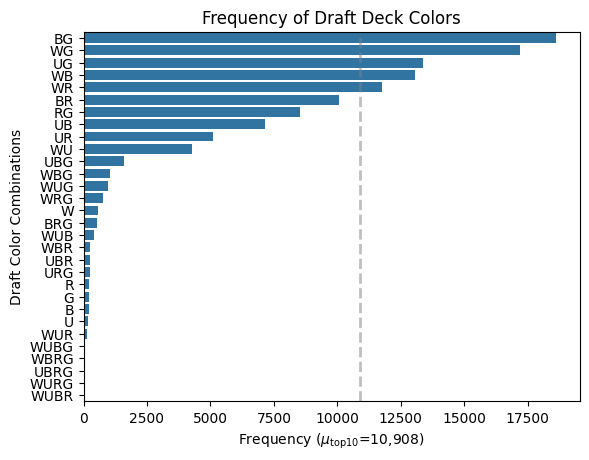

In [7]:
colors = df_draft.group_by("main_colors").len().sort(by='len', descending=True).collect()
colors = colors.to_pandas()
freq_mu = colors["len"].head(10).mean()

plt.axvline(
    freq_mu, color="gray", linestyle="--", linewidth=2, alpha=0.5
)
sns.barplot(data=colors.head(30), x="len", y="main_colors")
plt.title("Frequency of Draft Deck Colors")
plt.xlabel(r"Frequency ($\mu_{\text{top}10}$=" + f"{freq_mu:,.0f})")
plt.ylabel("Draft Color Combinations")
plt.show()

Since Bloomburrow is designed with 2-color tribal decks in mind, I will focus on these pairings.  The most frequent drafted decks are Black-Green, White-Green, and Red-White.  The least drafted are Blue-Black, Blue-Red and White-Blue.

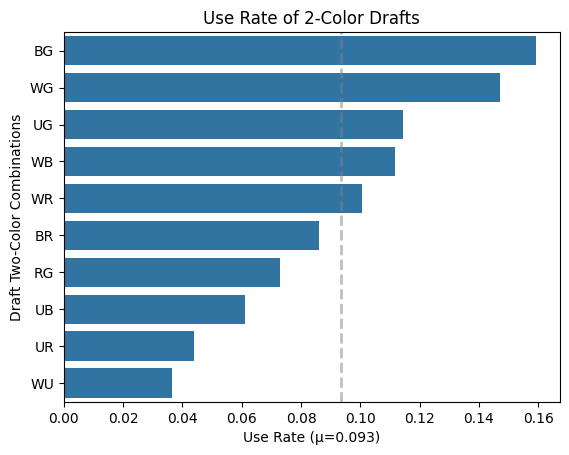

In [8]:
colors['use_rate'] = colors['len'] / colors['len'].sum()
colors = colors.sort_values("use_rate", ascending=False)
use_rate_mu = colors["use_rate"].head(10).mean()

plt.axvline(
    use_rate_mu, color="gray", linestyle="--", linewidth=2, alpha=0.5
)
sns.barplot(data=colors.head(10), x="use_rate", y="main_colors")
plt.title("Use Rate of 2-Color Drafts")
plt.xlabel(f"Use Rate (μ={use_rate_mu:0.3f})")
plt.ylabel("Draft Two-Color Combinations")
plt.show()

Next let's look at the color composition of the decks.  Below we can see that Green is the most 
frequently drafted color, with Black and White also favored.  Red and Blue are much less frequent.

The average draft use rate per component color is 40.0%.

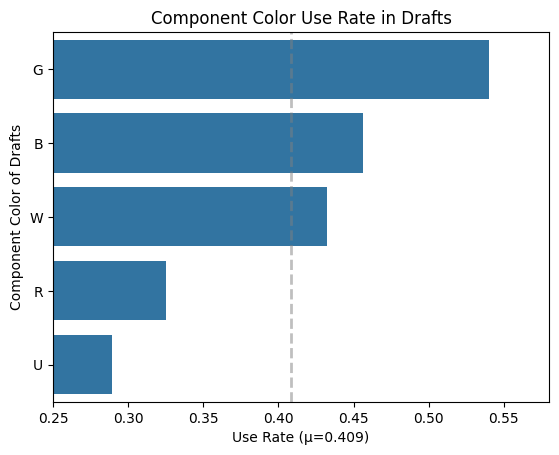

In [9]:
for color in ['W', 'U', 'B', 'R', 'G']:
    colors[color] = colors['main_colors'].apply(lambda x: True if color in x else False)

dfs = []
for color in ['W', 'U', 'B', 'R', 'G']:
    sums = colors[['len', color]].groupby(color).sum()
    use_rate = (sums.loc[True] / sums.sum()).values[0]
    dfs.append(pd.DataFrame({"color": color, "use_rate": use_rate}, index=[0]))
df = pd.concat(dfs).sort_values("use_rate", ascending=False).reset_index(drop=True)

use_rate_mu = df["use_rate"].mean()
plt.axvline(use_rate_mu, color="gray", linestyle="--", linewidth=2, alpha=0.5)
g = sns.barplot(data=df, x="use_rate", y="color")
g.set(xlim=(0.25, 0.58))
plt.title("Component Color Use Rate in Drafts")
plt.xlabel(f"Use Rate (μ={use_rate_mu:0.3f})")
plt.ylabel("Component Color of Drafts")
plt.show()

### Color Win Rates

In addition to the use rate of the colors, I will also look at the win rates of the colors.  First I calculate the weighted average win rate of 54.7%.  As we saw in the summary section, this indicates that the 17Lands player base has a higher win rate than the general draft player base.   

Below is a chart of the win rate for each color combination.  There are some mono-color decks with high win rates, but have very low use rates, so the results may be circumstantial with a small sample size.

In [10]:
mean_win_rate = df_summary.collect().to_pandas()['win_rate'].values[0]
print(f"Average Win Percentage: {mean_win_rate:0.2%}")

Average Win Percentage: 54.71%


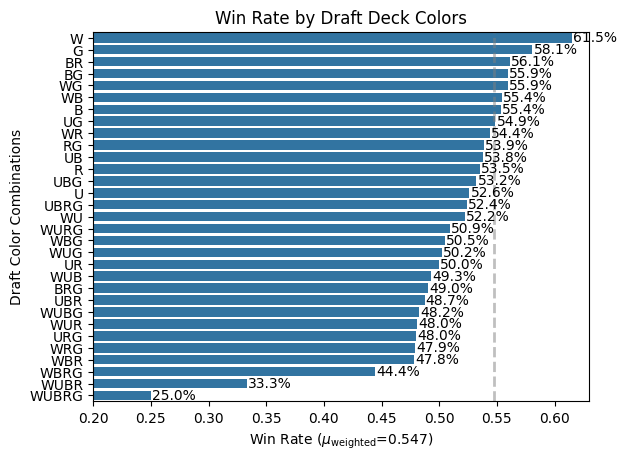

In [11]:
color_wins = (
    df_draft.group_by("main_colors")
    .agg(
        pl.col("n_games").sum(), 
        pl.col("n_wins").sum(),
        pl.col("n_losses").sum(),

    )
    .sort(by="n_games", descending=True)
    .collect()
)
color_wins = color_wins.to_pandas()
color_wins["win_rate"] = color_wins["n_wins"] / color_wins["n_games"]
color_wins["loss_rate"] = color_wins["n_losses"] / color_wins["n_games"]
color_wins = color_wins.sort_values("win_rate", ascending=False).reset_index(drop=True)

n = 50
plt.axvline(mean_win_rate, color="gray", linestyle="--", linewidth=2, alpha=0.5)
g = sns.barplot(data=color_wins.head(n), x="win_rate", y="main_colors")
g.set(xlim=(0.20, 0.63))
for index, row in color_wins.head(n).iterrows():
    plt.text(row["win_rate"] + 0.001, index, f"{row['win_rate']:.1%}", va="center")
plt.title("Win Rate by Draft Deck Colors")
plt.xlabel(r"Win Rate ($\mu_{\text{weighted}}$" + f"={mean_win_rate:0.3f})")
plt.ylabel("Draft Color Combinations")
plt.show()

Focusing on the 2-color decks, the Black-Red _Lizards: Opponents Lose Life_ is the highest win rate, but with a fairly low use rate.  The White-Red _Rabbits: Go-Wide_ and Black-Green _Squirrels: Forage_ are the most popular decks and have high win rates.

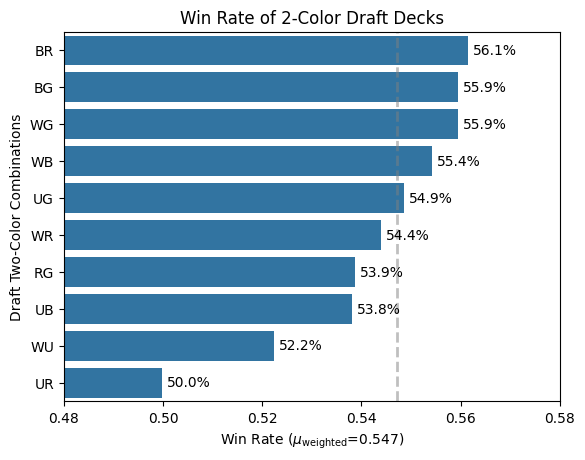

In [12]:
color_mask = color_wins["main_colors"].isin(colors.head(10)['main_colors'])
two_color_wins = color_wins.loc[color_mask].sort_values("win_rate", ascending=False).reset_index(drop=True)

plt.axvline(mean_win_rate, color="gray", linestyle="--", linewidth=2, alpha=0.5)
g = sns.barplot(data=two_color_wins, x="win_rate", y="main_colors")
g.set(xlim=(0.48, 0.58))
for index, row in two_color_wins.iterrows():
    plt.text(row["win_rate"] + 0.001, index, f"{row['win_rate']:.1%}", va="center")
plt.title("Win Rate of 2-Color Draft Decks")
plt.xlabel(r"Win Rate ($\mu_{\text{weighted}}$" + f"={mean_win_rate:0.3f})")
plt.ylabel("Draft Two-Color Combinations")
plt.show()

Here is the win rates for the five primary colors, based on if they are a main color in a deck.  For 
example, the "B" results below are for Black win rates in decks suck as WB, BG, B, and UBR. 

The average win rate for the data is 54.7%.  The decks with Black perform the best, with a 55.2% 
win rate.  Decks with Green and White also perform well, with 55.0% and 54.8% respectively. 
The decks with Red and Blue under-perform, with 53.8% and 53.2% win rate each.

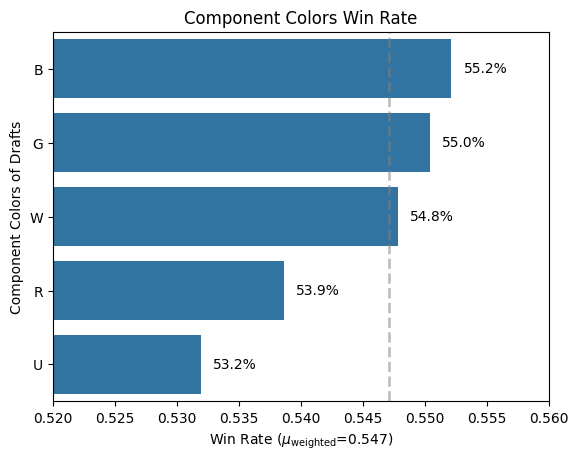

In [13]:
for color in ["W", "U", "B", "R", "G"]:
    color_wins[color] = color_wins["main_colors"].apply(
        lambda x: True if color in x else False
    )

dfs = []

for color in ["W", "U", "B", "R", "G"]:
    agg = color_wins.groupby(color).sum()
    agg["win_rate"] = agg["n_wins"] / agg["n_games"]
    dfs.append(pd.DataFrame({"component_color": color, "win_rate": agg.loc[True, "win_rate"]}, index=[0]))

df = pd.concat(dfs)
df = df.sort_values("win_rate", ascending=False).reset_index(drop=True)

plt.axvline(mean_win_rate, color="gray", linestyle="--", linewidth=2, alpha=0.5)
g = sns.barplot(data=df, x="win_rate", y="component_color")
g.set(xlim=(0.52, 0.56))
for index, row in df.iterrows():
    plt.text(row["win_rate"] + 0.001, index, f"{row['win_rate']:.1%}", va="center")
plt.title("Component Colors Win Rate")
plt.xlabel(r"Win Rate ($\mu_{\text{weighted}}$" + f"={mean_win_rate:0.3f})")
plt.ylabel("Component Colors of Drafts")
plt.show()

### Color Freq vs Win Rate

Let us now compare the use rate versus the win rate.  If the player base is well calibrated to the 
win rate with their selections.

Below we can see that most of the two-color decks fall in a straight line, with two outliers.  The Blue-Red _Otters: 
Non-creature Spells_ deck under-performs relative to its use rate.  On the other hand, the Black-Red 
_Lizards: Opponents Lose Life_ deck is a sleeper, with the highest win rates, but selected less than 
the average two-color deck.  The reason for this under-selection is that Red doesn't perform well 
in general, so many drafters probably avoid drafting Red unless they get strong Black-Red cards 
early.  White, Green, and Black are perform well, so the BG, WG, and WB decks are easy to pivot among 
in the draft.

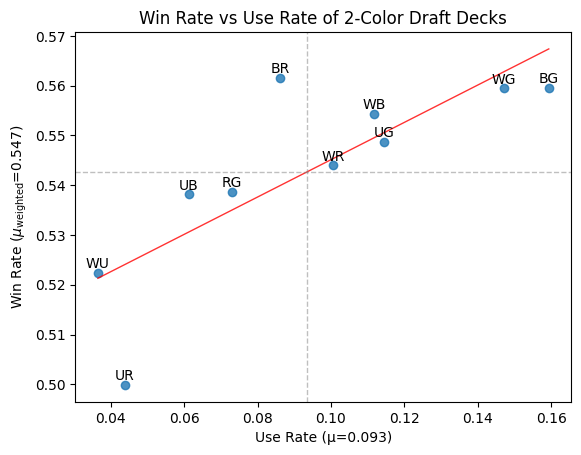

In [14]:
paired_df = color_wins[["main_colors", "win_rate", "loss_rate"]]
colors["use_rate"] = colors["len"] / colors["len"].sum()
select_colors = colors[["main_colors", "use_rate"]]
paired_df = paired_df.merge(select_colors, on="main_colors")

paired_filered_df = paired_df.loc[color_mask].reset_index(drop=True)

sns.regplot(
    data=paired_filered_df,
    x="use_rate",
    y="win_rate",
    scatter=True,
    ci=None,
    line_kws={"color": "red", "linewidth": 1, "alpha": 0.8},
)

for i, row in paired_filered_df.iterrows():
    plt.text(
        row["use_rate"],
        row["win_rate"]+0.001,
        str(row["main_colors"]),
        fontsize=10,
        ha="center",
    )

use_rate_mu = paired_filered_df["use_rate"].mean()
win_rate_mu = paired_filered_df["win_rate"].mean()

plt.axvline(use_rate_mu, color="gray", linestyle="--", linewidth=1, alpha=0.5)
plt.axhline(win_rate_mu, color="gray", linestyle="--", linewidth=1, alpha=0.5)
plt.title("Win Rate vs Use Rate of 2-Color Draft Decks")
plt.xlabel(f"Use Rate (μ={use_rate_mu:0.3f})")
plt.ylabel(r"Win Rate ($\mu_{\text{weighted}}$" + f"={mean_win_rate:0.3f})")
plt.show()

## Opposing Player Colors

We have data on the opposing player colors.  This is useful to understand the meta of the draft.  
For a given draft color combination, we can see the use rate by 17Lands players versus the use rate 
opponents.  Each draft color combination is also color coded if the win rate is above or below the 
17Lands player base average win rate.  A diagonal grey line is also added to show parity between the 
use by the 17Lands players and the general player base.

In the chart blow looks at 2-color drafts.  We can see that WG, BG, and UG are more favored by the 17Lands players and also 
has a higher win rate.  The UB color deck is more favored, but has a much lower win rate.  The other 
color pairs are on parity between the two player bases.

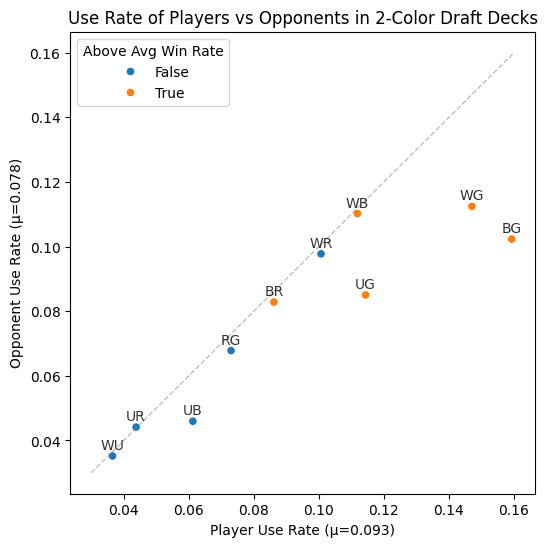

In [67]:
opp_colors = df_draft.group_by("opp_colors").len().sort(by='len', descending=True).collect().to_pandas()

opp_colors['opp_use_rate'] = opp_colors['len'] / opp_colors['len'].sum()
opp_colors = opp_colors.rename(columns=({"len": "opp_len"}))
opp_colors = opp_colors.merge(paired_df, left_on="opp_colors", right_on="main_colors", how="left")
opp_colors['Above Avg Win Rate'] = opp_colors['win_rate'] > mean_win_rate

plt.figure(figsize=(6, 6))

mask = opp_colors['main_colors'].str.len() == 2
opp_colors_filtered = opp_colors.loc[mask]

sns.scatterplot(
    data=opp_colors_filtered,
    x="use_rate",
    y="opp_use_rate",
    hue="Above Avg Win Rate"
)

plt.plot([0.03, 0.16], [0.03, 0.16], color="gray", linestyle="--", linewidth=1, alpha=0.5)

for i, row in opp_colors_filtered.iterrows():
    plt.text(
        row["use_rate"],
        row["opp_use_rate"]+0.002,
        str(row["opp_colors"]),
        fontsize=10,
        alpha=0.8,
        ha="center",
    )

use_rate_mu = opp_colors_filtered['use_rate'].mean()
opp_use_rate_mu = opp_colors_filtered['opp_use_rate'].mean()

plt.title("Use Rate of Players vs Opponents in 2-Color Draft Decks")
plt.xlabel(f"Player Use Rate (μ={use_rate_mu:0.3f})")
plt.ylabel(f"Opponent Use Rate (μ={opp_use_rate_mu:0.3f})")
plt.show()



Looking at the non-2-color drafts, we see that the 17Lands players are much less likely to pick any 
color companion that is not a 2-color deck.  The win rates are also lower for these decks, which some 
exceptions being the White, Green, and Black decks.

Based on this, it appears that if a drafter is selecting mono White, Green, or Black, they are better 
staying mono than drafting a 2-color deck into Blue or Red.  However, since the mono decks are 
so infrequent, the strong deck performance may be circumstantial to certain cards combinations and not 
generalize across the entire color set.

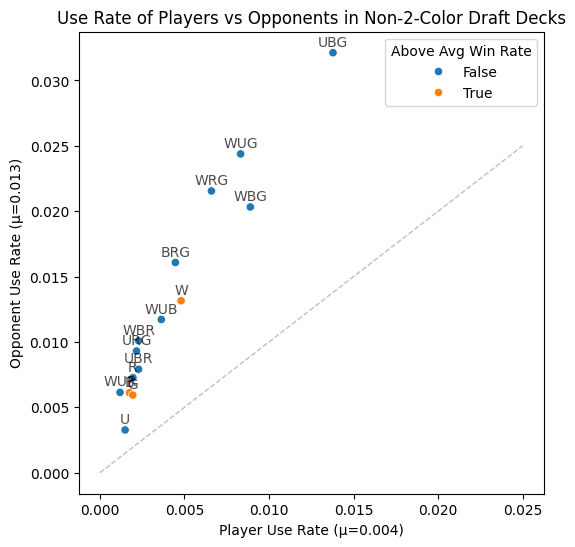

In [72]:
mask = opp_colors['main_colors'].str.len() != 2
mask &= opp_colors['use_rate'] > 0.001
opp_colors_filtered = opp_colors.loc[mask]

plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=opp_colors_filtered,
    x="use_rate",
    y="opp_use_rate",
    hue="Above Avg Win Rate"
)

plt.plot([0.0, 0.025], [0.0, 0.025], color="gray", linestyle="--", linewidth=1, alpha=0.5)

for i, row in opp_colors_filtered.iterrows():
    plt.text(
        row["use_rate"],
        row["opp_use_rate"]+0.0005,
        str(row["opp_colors"]),
        fontsize=10,
        alpha=0.7,
        ha="center",
    )

use_rate_mu = opp_colors_filtered['use_rate'].mean()
opp_use_rate_mu = opp_colors_filtered['opp_use_rate'].mean()

plt.title("Use Rate of Players vs Opponents in Non-2-Color Draft Decks")
plt.xlabel(f"Player Use Rate (μ={use_rate_mu:0.3f})")
plt.ylabel(f"Opponent Use Rate (μ={opp_use_rate_mu:0.3f})")
plt.show()


## Player Rank

To get a sense of player skill, below I plotted the number of wins by the player rank.  I do not 
have player IDs, so I cannot track individual player performance.  However, we can see the average 
performance of the player base. I also cannot track the number of drafts per player, so more 
frequent players will be over-represented.

While we do not have opponent rankings, we can infer that most opponents will be of the same rank 
as the player.  This is because the Arena draft system matches players with similar records.  Each 
ranked season is about 1 month long.  Ranks have "rank decay" between seasons, meaning an the start 
of the next season, a players rank will be lower than the previous season, requiring them to play 
more games to get back to their previous rank.  

So our snapshot of each rank is a mix of lower-skill, end-of-season players at their peak, and 
higher-skill, start-of-season players who are climbing back up the ranks.

Below we see that most drafts are played by players in the Platinum ranks.

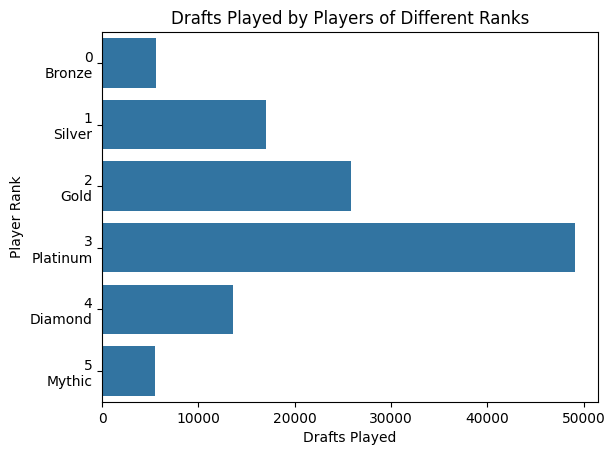

In [65]:
draft_rank = df_draft.group_by("rank").agg(
    pl.col("n_wins").len().alias('len'), 
    pl.col("n_wins").sum(), 
    pl.col("n_games").sum()
).sort(by='n_wins', descending=True).collect().to_pandas()
ordered_ranks = {0:'bronze', 1:'silver', 2:'gold', 3:'platinum', 4:'diamond', 5:'mythic'}
ranks = pd.DataFrame(ordered_ranks.items(), columns=['rank_value', 'rank'])
ranks["rank_name"] = ranks.apply(lambda x: str(x['rank_value']) + '\n' + x['rank'].capitalize(), axis=1)
ranks = ranks.merge(draft_rank, on='rank')
ranks = ranks.sort_values('rank_value')
sns.barplot(data=ranks, y='rank_name', x='len')

plt.title("Drafts Played by Players of Different Ranks")
plt.xlabel("Drafts Played")
plt.ylabel("Player Rank")
plt.show()

Here we see that the win rates vary by rank.  The higher ranks have higher win rates.  Bronze has 
by far the lowest win rate, indicating new or unskilled players.  The Silver rank has the highest 
win rate.  This may be from the large number of Gold and Platinum players that reset to Silver at 
the start of the season and quickly climb back up the ranks.

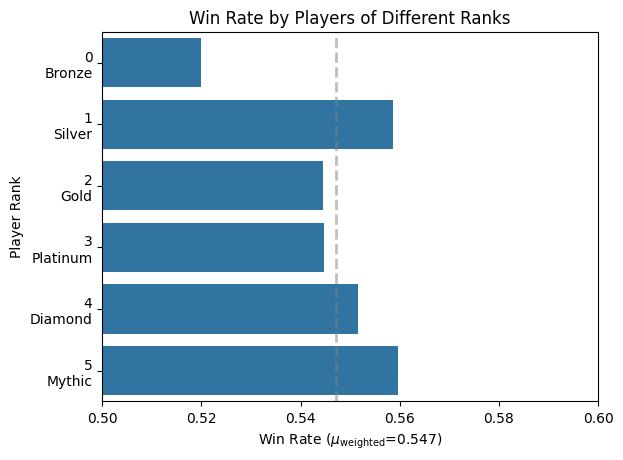

In [66]:
ranks['win_rate'] = ranks['n_wins'] / ranks['n_games']

plt.axvline(mean_win_rate, color="gray", linestyle="--", linewidth=2, alpha=0.5)
sns.barplot(data=ranks, y='rank_name', x='win_rate')
plt.xlim(0.5, 0.60)

plt.title("Win Rate by Players of Different Ranks")
plt.xlabel(r"Win Rate ($\mu_{\text{weighted}}$" + f"={mean_win_rate:0.3f})")
plt.ylabel("Player Rank")
plt.show()

### Low vs High Rank Players

## Lands

## Mana Curve